## Import dependencies
 

✅ Model Validation

In [157]:
import pandas as pd
import numpy as np
import os
import re  # Import the re module for regular expressions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

## Mount Google Drive to access files (Run this cell and follow the instructions)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Store the clened files in the array

In [146]:
csv_files = [
    "1984.csv",
    "alice.csv",
    "anne.csv",
    "baskervilles.csv",
    "black beauty.csv",
    "brazilian.csv",
    "charlottes.csv",
    "court life.csv",
    "DORIAN.csv",
    "dreams of a giant life.csv",
    "economics.csv",
    "fauntleroy.csv",
    "frankenstein.csv",
    "friendship.csv",
    "frost.csv",
    "gatsby.csv",
    "gibson.csv",
    "growth.csv",
    "gulliver.csv",
    "homing pigeon.csv",
    "honeybees.csv",
    "huck.csv",
    "i have a dream.csv",
    "jabberwocky.csv",
    "JANE EYRE.csv",
    "jekyll.csv",
    "lion.csv",
    "little women.csv",
    "lochinvar.csv",
    "lost treasure.csv",
    "magic city.csv",
    "marathon.csv",
    "matilda.csv",
    "meg.csv",
    "no enemies.csv",
    "nothing gold.csv",
    "NOTRE DAME.csv",
    "oliver twist -master.csv",
    "oliver twist -room.csv",
    "patagonia.csv",
    "peter.csv",
    "rebecca.csv",
    "sea fever.csv",
    "secret garden.csv",
    "sense.csv",
    "shiba.csv",
    "snowy river.csv",
    "sonnet 18.csv",
    "stopping by.csv",
    "this is going to hurt.csv",
    "THOSE WINTER.csv",
    "tom sawyer.csv",
    "treasure island.csv",
    "tyger.csv",
    "umami.csv",
    "van.csv",
    "voyage.csv",
    "war of the worlds.csv",
    "when u r old.csv",
    "wind in the willows.csv",
    "wizard.csv"
]
len(csv_files)

61

## Organise the data
🧹 Data Cleaning 

In [147]:
# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

for csv_file in csv_files:
    file_path = os.path.join('/content/drive/My Drive/Colab Notebooks', csv_file)  # Modify the path as needed
    df = pd.read_csv(file_path)
    
        # Extract the name from df.columns[0] by removing "[...]" patterns
    name_match = re.match(r'^(.*?)\[[^\]]*\]$', df.columns[0])
    if name_match:
        name = name_match.group(1)  # Extract the name
    else:
        name = df.columns[0] 
        
    df["Name"] = name
    # Check if the first column name contains "Fiction Question"
    if "Fiction Question" in df.columns[0]:
        df.rename(columns={df.columns[0]: "Question"}, inplace=True)
        df.rename(columns={df.columns[1]: "Answer"}, inplace=True)
        df.rename(columns={df.columns[2]: "QuestionType"}, inplace=True)
        for col_idx in range(3, 8):
            if col_idx >= len(df.columns):
                df["data" + str(col_idx - 2)] = None
            else:
                df.rename(columns={df.columns[col_idx]: "data" + str(col_idx - 2)}, inplace=True)
        df["Type"] = "Fiction"
    elif "Fiction Question" in df.columns[0]:
        df.rename(columns={df.columns[0]: "Question"}, inplace=True)
        df.rename(columns={df.columns[1]: "Answer"}, inplace=True)
        df.rename(columns={df.columns[2]: "QuestionType"}, inplace=True)
        for col_idx in range(3, 8):
            if col_idx >= len(df.columns):
                df["data" + str(col_idx - 2)] = None
            else:
                df.rename(columns={df.columns[col_idx]: "data" + str(col_idx - 2)}, inplace=True)
        df["Type"] = "Non-fiction"
    elif  "Fiction" in df.columns[1]:
        df.rename(columns={df.columns[1]: "Question"}, inplace=True)
        df.rename(columns={df.columns[0]: "Answer"}, inplace=True)
        for col_idx in range(2, 7):
            if col_idx >= len(df.columns):
                df["data" + str(col_idx - 1)] = None
            else:
                df.rename(columns={df.columns[col_idx]: "data" + str(col_idx - 1)}, inplace=True)
        df["Type"] = "Fiction"
    elif  "Non-Fiction" in df.columns[1]:
        df.rename(columns={df.columns[1]: "Question"}, inplace=True)
        df.rename(columns={df.columns[0]: "Answer"}, inplace=True)
        for col_idx in range(2, 7):
            if col_idx >= len(df.columns):
                df["data" + str(col_idx - 1)] = None
            else:
                df.rename(columns={df.columns[col_idx]: "data" + str(col_idx - 1)}, inplace=True)
        df["Type"] = "Non-fiction"
    elif  "Poem Question" in df.columns[0]:
        df.rename(columns={df.columns[1]: "Question"}, inplace=True)
        df.rename(columns={df.columns[0]: "Answer"}, inplace=True)
        for col_idx in range(3, 8):
            if col_idx >= len(df.columns):
                df["data" + str(col_idx - 1)] = None
            else:
                df.rename(columns={df.columns[col_idx]: "data" + str(col_idx - 1)}, inplace=True)
        df["Type"] = "Poem"
    
    if "QuestionType" in df.columns:
        columns_to_exclude = ["QuestionType"]
        # Drop columns_to_exclude from the DataFrame
        df.drop(columns=columns_to_exclude, inplace=True)
    

    # Concatenate the data with the combined DataFrame
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Remove rows where "Name" is NaN
combined_data = combined_data.dropna(subset=["Name","Question","Answer"])
# remove duplicates
combined_data.drop_duplicates(subset=['Question', 'Type', 'data1', 'data2', 'data3', 'data4'], keep='first', inplace=True)
# Convert the 'Question' column to numeric, and coerce non-numeric values to NaN
combined_data['Question'] = pd.to_numeric(combined_data['Question'], errors='coerce')

# Remove rows where 'Question' is NaN (i.e., non-numeric)
combined_data = combined_data.dropna(subset=['Question','Type', 'data1', 'data2', 'data3', 'data4'])

# Select only the desired columns
selected_columns = ["Name", "Question", "Answer", "Type", "data1", "data2", "data3", "data4","data5"]
combined_data = combined_data.loc[:, selected_columns]
combined_data

,Name,Question,Answer,Type,data1,data2,data3,data4,data5
0,1984,1.0,A,Fiction,A,A,A,A,A
1,1984,2.0,B,Fiction,B,B,B,B,B
2,1984,3.0,C,Fiction,C,C,C,C,C
3,1984,4.0,A,Fiction,A,A,A,A,A
4,1984,5.0,B,Fiction,B,B,A,B,C
...,...,...,...,...,...,...,...,...,...
935,wizard,5.0,D,Fiction,D,A,A,A,A
936,wizard,6.0,A,Fiction,B,A,A,A,A
937,wizard,7.0,D,Fiction,B,D,B,D,D
940,wizard,10.0,C,Fiction,B,C,C,B,B


## Feauture Extraction

In [129]:
len(combined_data)

304

## FEAUTURE EXTRACTION

In [148]:

# Define features and target variable
features = ['Question', 'Type', 'data1', 'data2', 'data3', 'data4']
target = 'Answer'

# Create a new binary target variable indicating whether 'data5' is equal to 'Answer'
combined_data['Target'] = (combined_data['data5'] == combined_data['Answer']).astype(int)
# combined_data['Target']
# Convert 'data1' through 'data4' to integers
letter_to_int_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
type_to_int_mapping = {'Fiction': 1, 'Non-fiction': 2, 'Poem': 3}
# Drop columns with no observed values


# Convert 'data1' through 'data4' to integers using the mapping
for col in ['data1', 'data2', 'data3', 'data4']:
    combined_data[col] = combined_data[col].map(letter_to_int_mapping)
combined_data['Type'] = combined_data['Type'].map(type_to_int_mapping)



## Train

In [149]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data[features], combined_data['Target'], test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
# Create an imputer to fill in missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data as well
X_test_imputed = imputer.transform(X_test)

# Now, you can train your Logistic Regression model on the imputed data
model.fit(X_train_imputed, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy for the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy for Logistic Regression:", accuracy)
accuracy

Accuracy for Logistic Regression: 0.6065573770491803


0.6065573770491803

## Run Model

In [150]:
# Create a new data point (example)
new_data = pd.DataFrame({
    'Question': [5],
    'Type': ["Poem"], 
    'data1': ["B"],
    'data2': ["D"],
    'data3': ["B"],
    'data4': ["D"], 
})

# Convert categorical 'Type' to integer using your mapping (e.g., 1 for Fiction)
new_data['Type'] = new_data['Type'].map(type_to_int_mapping)
for col in ['data1', 'data2', 'data3', 'data4']:
    new_data[col] = new_data[col].map(letter_to_int_mapping)


# Impute missing values if needed
new_data_imputed = imputer.transform(new_data)

# Make a prediction using the trained model
prediction = model.predict(new_data_imputed)

# Convert the prediction (0 or 1) back to the original label ('A', 'B', 'C', etc.)
int_to_letter_mapping = {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F'}
if prediction[0] in int_to_letter_mapping:
    predicted_answer = int_to_letter_mapping[prediction[0]]

    print(f"Predicted Answer: {predicted_answer}")
else:
    print('not sure of the answer')

Predicted Answer: A


## 🤔 Model Interpretation 
### Feature Importance:
While logistic regression doesn't provide feature importances like tree-based models, we can still assess the importance of each feature by looking at the magnitude (absolute value) of the coefficients. Larger coefficients suggest a stronger influence on the predicted probability.

In [152]:
# Get feature coefficients
coef = model.coef_[0]

# Associate coefficients with feature names
feature_names = X_train.columns

# Sort features by absolute coefficient value
sorted_features = sorted(zip(feature_names, coef), key=lambda x: abs(x[1]), reverse=True)

# Print or visualize the sorted features
for feature, coefficient in sorted_features:
    print(f"{feature}: {coefficient:.4f}")


data3: -0.1723
data4: 0.0974
data1: 0.0342
Question: -0.0258
data2: 0.0063
Type: 0.0001


### Odds Ratio:
to understand how a one-unit change in a feature affects the odds of the target variable being in a particular class.

In [155]:

odds_ratio = np.exp(coef)

# Print or visualize the odds ratio for each feature
for feature, ratio in zip(feature_names, odds_ratio):
    print(f"{feature}: {ratio:.4f}")

Question: 0.9746
Type: 1.0001
data1: 1.0348
data2: 1.0063
data3: 0.8417
data4: 1.1023


## ✅ Model Validation

In [158]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.91      0.71        33
           1       0.70      0.25      0.37        28

    accuracy                           0.61        61
   macro avg       0.64      0.58      0.54        61
weighted avg       0.64      0.61      0.56        61



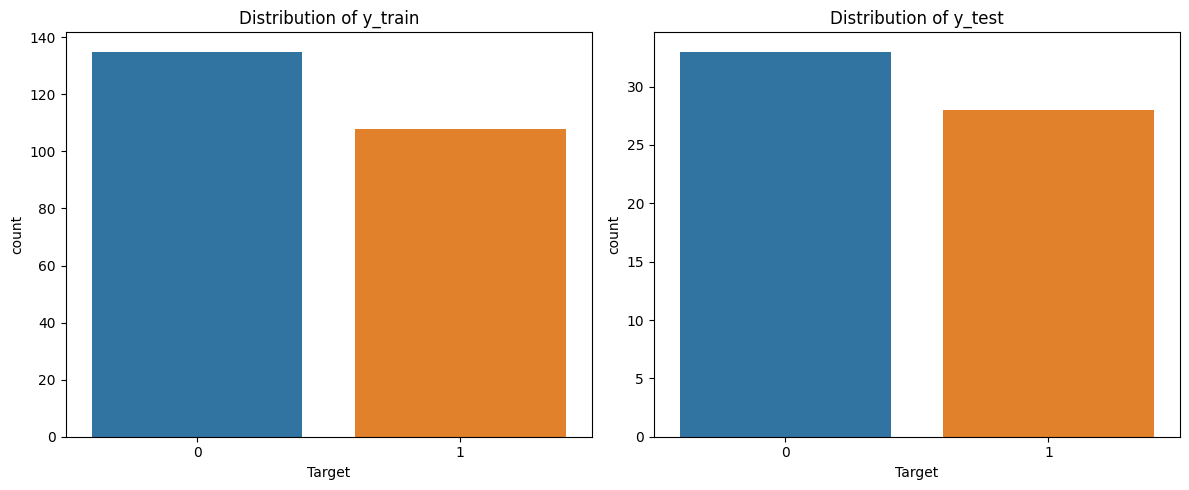

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(12, 5))

# Plot the distribution of y_train
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Distribution of y_train")

# Plot the distribution of y_test
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Distribution of y_test")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
